
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing-2.csv to BostonHousing-2.csv


{'BostonHousing-2.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,

# Load Data to Spark Cluster

In [10]:
dataset = spark.read.csv('BostonHousing-2.csv',inferSchema=True, header =True)

In [11]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [12]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [13]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [14]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [15]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


#**TASK-2**

In [52]:
# Descriptive Statistics
stats1 = """
SELECT
    ROUND(AVG(medv), 3) AS mean_medv,
    ROUND(STDDEV(medv), 3) AS std_dev_medv,
    MIN(medv) AS min_medv,
    MAX(medv) AS max_medv
FROM bostonh.bos_housing
"""

medv_stats = spark.sql(stats1)
medv_stats.show()

+---------+------------+--------+--------+
|mean_medv|std_dev_medv|min_medv|max_medv|
+---------+------------+--------+--------+
|   22.533|       9.197|     5.0|    50.0|
+---------+------------+--------+--------+



In [18]:
#Displaying mean "rm"(average number of rooms per dwelling)
rm_mean = spark.sql("SELECT AVG(rm) AS rm_mean FROM bostonh.bos_housing").collect()[0]["rm_mean"]
print("Mean value of rm (average number of rooms per dwelling):", rm_mean)

Mean value of rm (average number of rooms per dwelling): 6.284634387351787


#**TASK-3**

In [20]:
#Data Exploration: Identify the property with the highest crime rate ("crim")
prop_high_crim = spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim = (SELECT MAX(crim) FROM bostonh.bos_housing)")
print("Property with the highest crime rate are mentioned below:")
prop_high_crim.show()

Property with the highest crime rate are mentioned below:
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [21]:
#Data Exploration:Property with the lowest median home value ("medv").
prop_low_medv = spark.sql("SELECT * FROM bostonh.bos_housing WHERE medv = (SELECT MIN(medv) FROM bostonh.bos_housing)")
print("Property with the lowest median home value are mentioned below:")
prop_low_medv.show()

Property with the lowest median home value are mentioned below:
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



#**TASK-4**

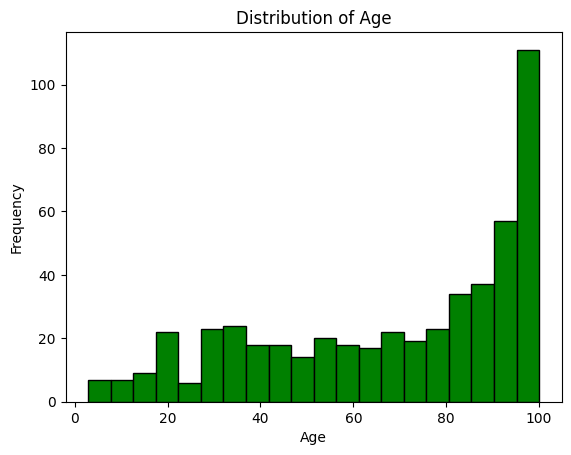

In [22]:
#Data Distribution: Histogram showing the distribution of the "age" column.
import matplotlib.pyplot as plt

# Retrieve the "age" column data
#age_df = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()
age_df = spark.sql("SELECT age FROM bostonh.bos_housing").rdd.flatMap(lambda x: x).collect()

# Create a histogram with a different color
plt.hist(age_df, bins=20, edgecolor='k', color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [23]:
#Data Distribution:Properties with a "chas" value of 1 (indicating proximity to the Charles River)
percent_prop_chas_val_1 = spark.sql("SELECT COUNT(*) AS num_properties_with_chas_value_of_1 FROM BostonH.bos_housing WHERE chas = 1").collect()[0]["num_properties_with_chas_value_of_1"] / total_records * 100
print("Percentage of properties with a chas value of 1:", percent_prop_chas_val_1, "%")


Percentage of properties with a chas value of 1: 6.91699604743083 %


#**TASK-5**

In [25]:
#Correlation Analysis: Correlation coefficient between "rm" and "medv.
corr_trial = """
SELECT
    CORR(rm, medv) AS correlation_rm_medv
FROM bostonh.bos_housing
"""
corr_rm_medv = spark.sql(corr_trial)
corr_rm_medv.show()


+-------------------+
|correlation_rm_medv|
+-------------------+
| 0.6953599470715401|
+-------------------+



In [27]:
# Correlation Analysis: correlation between "ptratio" and "nox"
corr_trial_2 = """
SELECT
    CORR(ptratio, nox) AS correlation_ptratio_nox
FROM bostonh.bos_housing
"""

corr_ptratio_nox = spark.sql(corr_trial_2)
corr_ptratio_nox.show()

+-----------------------+
|correlation_ptratio_nox|
+-----------------------+
|    0.18893267711276893|
+-----------------------+



#**TASK-6**

In [28]:
#Advance Querying: Display the top 5 neighborhoods with the highest median home
neighborhoods_top5 = spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY medv DESC LIMIT 5")
print("The top 5 neighborhoods with the highest median home values (""medv"")")
neighborhoods_top5.show()

The top 5 neighborhoods with the highest median home values (medv)
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [39]:
# Advance Querying: Average property age for neighborhoods with "chas" value of 1 and 0

query = """
SELECT
    ROUND(AVG(age), 3) AS avg_age_chas1
FROM bostonh.bos_housing
WHERE chas = 1
"""

avg_age_neighbors_chas_1 = spark.sql(query)
avg_age_neighbors_chas_1.show()

# Average property age for neighborhoods with a "chas" value of 0
query = """
SELECT
    ROUND(AVG(age), 3) AS avg_age_chas0
FROM bostonh.bos_housing
WHERE chas = 0
"""

avg_age_neighbors_chas_0 = spark.sql(query)
avg_age_neighbors_chas_0.show()

+-------------+
|avg_age_chas1|
+-------------+
|         77.5|
+-------------+

+-------------+
|avg_age_chas0|
+-------------+
|       67.912|
+-------------+



#**TASK-7**

In [44]:
# Visualization: Hive view named "property_age_view" that includes the "age" and "medv" columns.
query_view= """
CREATE OR REPLACE VIEW property_age_view AS
SELECT age as AGE, medv as MEDV
FROM bostonh.bos_housing
"""
# Execute the query to create the view
spark.sql(query_view)

# Select data from the view
dataofview = spark.sql("SELECT * FROM property_age_view LIMIT 10")
# Show the data
dataofview.show()


+-----+----+
|  age|medv|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
+-----+----+



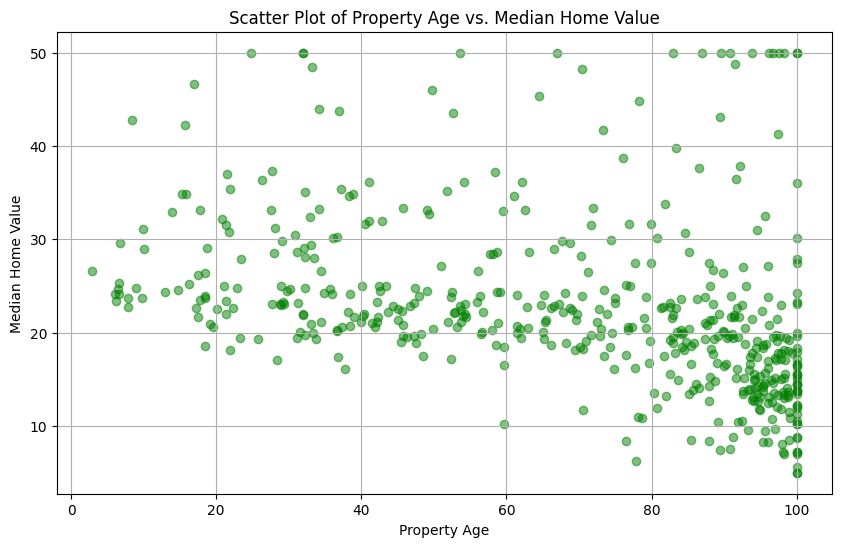

In [49]:
# Visualization: Scatter plot of property age against median home value using Matplotlib
# Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
import matplotlib.pyplot as plt

# Query to retrieve data for the scatter plot
query7 = """
SELECT
    age, medv
FROM property_age_view
"""
result = spark.sql(query7).toPandas()

# Extract the data for plotting
age = result['age']
medv = result['medv']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, medv, c='green', alpha=0.5) # Set the color to 'green' and adjust alpha as needed
plt.title("Scatter Plot of Property Age vs. Median Home Value")
plt.xlabel("Property Age")
plt.ylabel("Median Home Value")
plt.grid(True)

# Show the plot
plt.show()


Scatter plot with trend line

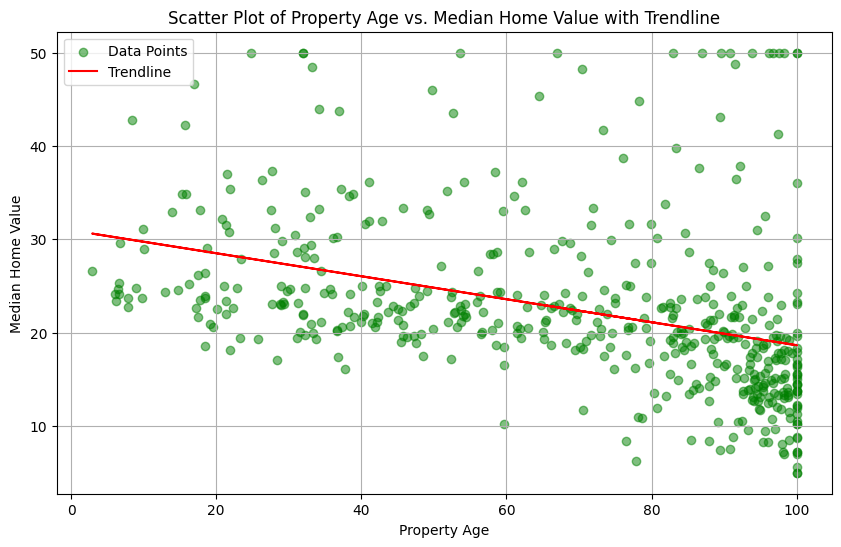

In [50]:
# Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
import matplotlib.pyplot as plt
import numpy as np

# Query to retrieve data for the scatter plot
query7 = """
SELECT
    age, medv
FROM property_age_view
"""
result = spark.sql(query7).toPandas()

# Extract the data for plotting
age = result['age']
medv = result['medv']

# Perform linear regression
slope, intercept = np.polyfit(age, medv, 1)
trendline = intercept + slope * age

# Create a scatter plot with the trendline
plt.figure(figsize=(10, 6))
plt.scatter(age, medv, c='green', alpha=0.5, label='Data Points')  # Set the scatter points' color to green
plt.plot(age, trendline, color='red', label='Trendline')  # Set the trendline color to green
plt.title("Scatter Plot of Property Age vs. Median Home Value with Trendline")
plt.xlabel("Property Age")
plt.ylabel("Median Home Value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



#**TASK-8**

In [36]:
#Outlier Detection:Properties with a "crim" value greater than 10 (considered as potential outliers).
pot_out = spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim > 10")
print("Properties with a 'crim' value greater than 10 (potential outliers):")
pot_out.show()


Properties with a 'crim' value greater than 10 (potential outliers):
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.874

#**TASK-9**

**Null Hypothesis (H0):** There is no statistically significant relationship between the average number of rooms (rm) and median home value (medv).

**Alternative Hypothesis (H1):** There is a statistically significant relationship between the average number of rooms (rm) and median home value (medv).


In [51]:
#Hypothesis Testing:
from scipy.stats import pearsonr



# Select data from the view
view_data = spark.sql("SELECT rm, medv FROM BostonH.bos_housing")

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_data = view_data.toPandas()

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(pandas_data['rm'], pandas_data['medv'])

# Display the results
print("Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)


Correlation Coefficient: 0.6953599470715394
P-Value: 2.4872288710080976e-74
